# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.187639e+01     7.217556e+00
 * time: 0.0044689178466796875
     1     2.975777e+01     5.675304e+00
 * time: 0.013624906539916992
     2     2.439912e+01     7.320781e+00
 * time: 0.034134864807128906
     3     1.566054e+01     3.131565e+00
 * time: 0.056871891021728516
     4     1.257554e+01     1.361872e+00
 * time: 0.0759119987487793
     5     1.145160e+01     8.865860e-01
 * time: 0.09489798545837402
     6     1.070514e+01     1.791065e+00
 * time: 0.11011099815368652
     7     1.023195e+01     1.011223e+00
 * time: 0.12539196014404297
     8     1.001458e+01     6.593926e-01
 * time: 0.1407608985900879
     9     9.816882e+00     6.936663e-01
 * time: 0.15611600875854492
    10     9.637841e+00     4.573629e-01
 * time: 0.17158102989196777
    11     9.558540e+00     5.546774e-01
 * time: 0.187255859375
    12     9.470379e+00     4.327215e-01
 * time: 0.20359396934509277
    13     9.429578e+00     6.914338e-01
 * time: 0

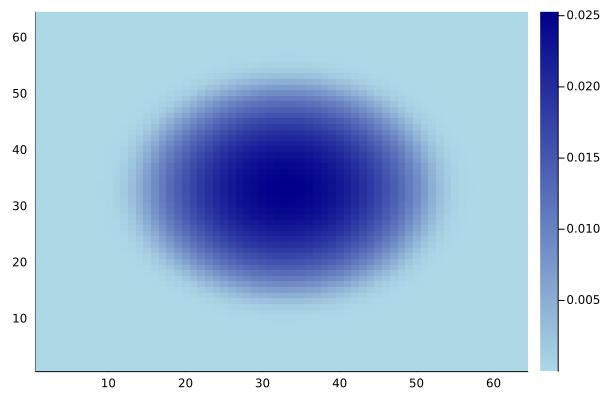

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)